<a href="https://colab.research.google.com/github/Tclack88/misc-analysis/blob/main/US_mass_shootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
# Mass Shootings data source: https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/
data = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQBEbQoWMn_P81DuwmlQC0_jr2sJDzkkC0mvF6WLcM53ZYXi8RMfUlunvP1B5W0jRrJvH-wc-WGjDB1/pub?gid=0&single=true&output=csv"
df = pd.read_csv(data)
df

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,-,semiautomatic handgun,-,-,M,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021
1,Boulder supermarket shooting,"Boulder, Colorado",3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,Yes,-,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,https://www.denverpost.com/2021/03/22/police-a...,https://www.thedailybeast.com/boulder-colorado...,-,39.986961,-105.251168,Mass,2021
2,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/21,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,-,White,M,https://www.ajc.com/news/breaking-multiple-sho...,-,-,34.111653,-84.580376,Spree,2021
3,Springfield convenience store shooting,"Springfield, Missouri",3/16/20,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,-,-,-,-,-,-,M,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020
4,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,-,-,semiautomatic handgun,-,Black,M,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Shopping centers spree killings,"Palm Bay, Florida",4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,He suffered from paranoid delusions. A judge f...,Yes,"Gun store in Norwood, Ohio; The Oaks Trading P...","One rifle, one revolver, one shotgun","Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.033189,-80.642969,Spree,1987
118,United States Postal Service shooting,"Edmond, Oklahoma",8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,He was worried he had inherited mental problem...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Three semiautomatic handguns,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.667202,-97.429370,Mass,1986
119,San Ysidro McDonald's massacre,"San Ysidro, California",7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,"The day before the shooting, he tried to make ...",Yes,Unknown,"One semiautomatic handgun, one rifle (assault)...",9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.552001,-117.043081,Mass,1984
120,Dallas nightclub shooting,"Dallas, Texas",6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,"During his last meal with his wife, he confess...",No,"Hines Boulevard Pawn Shop in Dallas, Texas",One semiautomatic handgun,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984


In [144]:
# core_dat = df[['year','total_victims']]
# core_dat.date=pd.to_datetime(df.date)
# core_dat = core_dat.sort_values('date')
core_dat = core_dat.sort_values('year')
core_dat

,year,total_victims
121,1982,11
120,1984,7
119,1984,41
118,1986,21
117,1987,20
...,...,...
4,2020,5
3,2020,4
2,2021,9
1,2021,10


In [145]:
pres_list = pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States")[1][1:-1]  # remove the first entry (it's a range and the year is not applicable). Remove last entry because it's a source list
pres_list.Election = pres_list.Election.astype(int)
pres_list = pres_list[2:][pres_list.Election >= 1980] # remove years before 1980 (not '82, otherwise 82 & 83 are removed)
pres_list = pres_list[['Election','Party[b].1']]
pres_list.columns = ['year','party']
pres_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,year,party
71,1980,Republican
72,1984,Republican
73,1988,Republican
74,1992,Democratic
75,1996,Democratic
76,2000,Republican
77,2004,Republican
78,2008,Democratic
79,2012,Democratic
80,2016,Republican


In [147]:
# "Fill out" years explicitly
new_index = list(range(min(df.year),max(df.year)+1)) # get full range of years
print(new_index)
pres_df = pres_list.set_index('year')
pres_df = pres_df.reindex(new_index).shift(periods=1).ffill().bfill() # Years filled out. Shift to account for election year not equaling presiding year. 
#Note: got lucky with backfill, this won't always generalize for different years
pres_df = pres_df.reset_index()
pres_df

[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


,year,party
0,1982,Republican
1,1983,Republican
2,1984,Republican
3,1985,Republican
4,1986,Republican
5,1987,Republican
6,1988,Republican
7,1989,Republican
8,1990,Republican
9,1991,Republican


In [148]:
total_victims_by_year = core_dat.groupby('year').sum()
total_incidents_by_year = core_dat.groupby('year').count()
total_incidents_by_year.columns = ['incidents']
# prep data for merging
total_victims_by_year = total_victims_by_year.reset_index()
total_incidents_by_year = total_incidents_by_year.reset_index()

In [149]:
# Merge
plot_df = pres_df.merge(total_victims_by_year).merge(total_incidents_by_year)

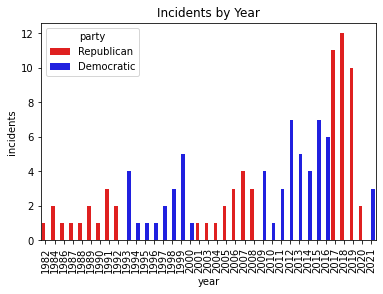

In [150]:
import seaborn as sb
import matplotlib.pyplot as plt
# color_dict = {'Republican':'red', 'Democratic': 'blue'}
incidents_plot = sb.barplot(data=plot_df, x='year', y='incidents',hue='party', palette=["red", "blue"])
incidents_plot.set_title('Incidents by Year')
plt.xticks(rotation=90);

In [152]:
plot_df[['party','incidents']].groupby('party').sum()
# plot_df

,incidents
party,
Democratic,58
Republican,64
